# Sports car prices dataset

Imports the necessary libraries for data analysis and visualization.

- pandas: for data manipulation and analysis
- datetime: for working with date and time data
- numpy: for numerical operations
- scikit-learn: for machine learning algorithms
- matplotlib.pyplot: for creating static visualizations
- seaborn: for creating statistical graphics

In [91]:
import pandas as pd
import datetime as dt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, TargetEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


import matplotlib.pyplot as plt
import seaborn as sns


Read the CSV file

In [92]:
df_raw = pd.read_csv('Data/Sport car price.csv')
df = df_raw.copy(deep=True)
# Display the first 5 rows of the DataFrame
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


Exploring the dataset

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [94]:
df.describe(include = 'all')

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
count,1007,1007,1007.000000,997,1007,1004,1007,1007
unique,38,176,NaN,45,124,93,43,367
top,Porsche,GT,NaN,4,503,590,3.5,"500,000"
freq,88,55,NaN,219,45,71,153,34
mean,NaN,NaN,2021.201589,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.019802,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1965.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2022.000000,NaN,NaN,NaN,NaN,NaN


In [95]:
df.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

Verifying the Engine size of the vehicles

In [96]:
df['Engine Size (L)'].unique()

array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', 'Electric', '6.5', '3.7', 'Electric Motor',
       '2.5', '1.5 + Electric', '6.8', '8.4', nan, '6.6', '7', '1.7',
       '3.3', '-', '6.7', '1.8', 'Electric (tri-motor)', '5.5',
       'Electric (93 kWh)', 'Electric (100 kWh)', 'Hybrid (4.0)', '4.6',
       '3.6', '1.5', 'Hybrid', '5.7', '2.0 (Electric)', '4.0 (Hybrid)',
       '0', '6.4', '6.3', '2.3'], dtype=object)

Adjusting the only electric engine car needed 

In [97]:
# Check if 'Engine Size (L)' contains 'electric' and create 'Electric' column
df['Electric'] = df['Engine Size (L)'].astype(str).str.lower().str.contains('electric')
df.loc[42, 'Engine Size (L)'] = 1.5
df.loc[df['Electric'] == True]


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Electric
26,Rimac,Nevera,2022,Electric,1914,1696,1.85,"2,400,000",True
37,Porsche,Taycan 4S,2022,Electric Motor,562,479,3.8,"104,000",True
42,BMW,i8,2020,1.5,369,420,4.2,"148,500",True
97,Rimac,Nevera,2022,Electric,1914,1696,1.95,"2,400,000",True
99,Tesla,Roadster,2022,Electric,1000+,737,1.9,"200,000",True
185,Porsche,Taycan,2021,Electric,750,774,2.6,"185,000",True
278,Rimac,C_Two,2022,Electric,1914,1732,1.85,"2,400,000",True
280,Pininfarina,Battista,2022,Electric,1874,1696,1.9,"2,500,000",True
299,Porsche,Taycan,2022,Electric,616,774,2.6,"79,900",True
300,Tesla,Model S,2022,Electric,1020,1050,1.98,"119,000",True


Verifying the Engine size of hybrid and electric vehicles

In [98]:
# Check if 'Engine Size (L)' contains 'electric' and create 'Electric' column
df['Electric'] = df['Engine Size (L)'].astype(str).str.lower().str.contains('electric')
df.loc[df['Engine Size (L)'].isnull(), 'Electric'] = True
df.loc[df['Engine Size (L)'] == '-', 'Electric'] = True
df['Electric'].value_counts()


Electric
False    953
True      54
Name: count, dtype: int64

In [99]:
# Changing the Engine Size of Electric Cars to 0

df.loc[df['Electric'] == True, 'Engine Size (L)'] = '0'


In [100]:
# Checking if the 'Engine Size (L)' has the word 'Hibrid' 

df['Hybrid'] = df['Engine Size (L)'].astype(str).str.lower().str.contains('hybrid')
(df['Hybrid'].value_counts())
df.loc[df['Hybrid'] == True]


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Electric,Hybrid
626,Porsche,Panamera Turbo S E-Hybrid,2021,Hybrid (4.0),690,641,3,"186,350",False,True
732,BMW,i8,2022,Hybrid,369,184,4.2,"148,500",False,True
855,Ferrari,SF90 Stradale,2021,4.0 (Hybrid),986,590,2.5,"625,000",False,True
967,Porsche,Panamera Turbo S E-Hybrid,2021,Hybrid,689,642,3,"190,000",False,True


Correcting the Hybrid engine missing sizes

In [101]:
engine_updates = {
    732: '1.5',
    626: '4.0',
    967: '4.0',
    855: '4.0'
}

# Update the 'Engine Size (L)' column based on the engine_updates dictionary
for idx, value in engine_updates.items():
    df.loc[idx, 'Engine Size (L)'] = value



Handling 'torque' missing values

In [102]:
df = df[df['Torque (lb-ft)'].isnull() != True]

Verifying the Engine size of the vehicles

In [103]:
# Check if the column has any missing values, text or non-numeric values

df['Engine Size (L)'].unique()


array(['3', '5.2', '3.9', '4', '4.4', '6.2', '3.8', '8', '5', '3.5',
       '4.7', '2', '2.9', '6', '0', '6.5', '3.7', '2.5', 1.5, '6.8',
       '8.4', '6.6', '7', '1.7', '3.3', '6.7', '1.8', '5.5', '4.0', '4.6',
       '3.6', '1.5', '5.7', '6.4', '6.3', '2.3'], dtype=object)

Converting the types of each column

In [104]:
# Replace commas with dots in the 'Price (in USD)', 'Torque' and 'Horsepower' columns
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '')
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].str.replace(',', '')
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].str.replace('+', '')
df['Horsepower'] = df['Horsepower'].str.replace('+', '')
df['Horsepower'] = df['Horsepower'].str.replace(',', '')
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].str.replace('<', '')


# Removing the rows where torque is equal to '-'
df = df[df['Torque (lb-ft)'] != '-']


In [105]:
df = df.astype({
    'Car Make': 'string',
    'Price (in USD)': 'float64',
    'Year': 'int64',
    'Engine Size (L)': 'float64',
    'Torque (lb-ft)': 'float64',
    '0-60 MPH Time (seconds)': 'float64',
    'Horsepower': 'int64',
    'Car Model': 'string'
})


Last Check on the info

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1006
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 1003 non-null   string 
 1   Car Model                1003 non-null   string 
 2   Year                     1003 non-null   int64  
 3   Engine Size (L)          1003 non-null   float64
 4   Horsepower               1003 non-null   int64  
 5   Torque (lb-ft)           1003 non-null   float64
 6   0-60 MPH Time (seconds)  1003 non-null   float64
 7   Price (in USD)           1003 non-null   float64
 8   Electric                 1003 non-null   bool   
 9   Hybrid                   1003 non-null   bool   
dtypes: bool(2), float64(4), int64(2), string(2)
memory usage: 72.5 KB


### Machine Learning Process

#### Feature Engineering

In [107]:
df['Car Make'].value_counts()

Car Make
Porsche          88
McLaren          75
Audi             71
Lamborghini      66
BMW              63
Chevrolet        60
Ferrari          55
Mercedes-Benz    54
Aston Martin     50
Ford             48
Dodge            41
Nissan           37
Lotus            35
Jaguar           30
Lexus            26
Bentley          25
Maserati         24
Bugatti          23
Alfa Romeo       16
Acura            16
Tesla            16
Koenigsegg       15
Rimac            14
Pagani           12
Mercedes-AMG     11
Rolls-Royce      10
Toyota            5
Subaru            3
W Motors          3
TVR               2
Pininfarina       2
Ariel             1
Mazda             1
Polestar          1
Shelby            1
Kia               1
Alpine            1
Ultima            1
Name: count, dtype: Int64

In [108]:
df['Car Make'].unique()

<StringArray>
[      'Porsche',   'Lamborghini',       'Ferrari',          'Audi',
       'McLaren',           'BMW', 'Mercedes-Benz',     'Chevrolet',
          'Ford',        'Nissan',  'Aston Martin',       'Bugatti',
         'Dodge',        'Jaguar',    'Koenigsegg',         'Lexus',
         'Lotus',      'Maserati',    'Alfa Romeo',         'Ariel',
       'Bentley',  'Mercedes-AMG',        'Pagani',      'Polestar',
         'Rimac',         'Acura',         'Mazda',   'Rolls-Royce',
         'Tesla',        'Toyota',      'W Motors',        'Shelby',
           'TVR',        'Subaru',   'Pininfarina',           'Kia',
        'Alpine',        'Ultima']
Length: 38, dtype: string

In [109]:
# Create encoder
label_encoder = LabelEncoder()

# Transform the Car Make column
df['Car Make Encoded'] = label_encoder.fit_transform(df['Car Make'])

In [110]:
df.Horsepower.nlargest(15)

389     10000
885     10000
877      2000
420      1973
523      1973
987      1973
697      1972
1003     1972
26       1914
97       1914
168      1914
278      1914
352      1914
439      1914
509      1914
Name: Horsepower, dtype: int64

In [111]:
df = df.loc[df['Horsepower'] < 3000]

In [117]:
df['Horsepower_bin'] = pd.qcut(df['Horsepower'],6)

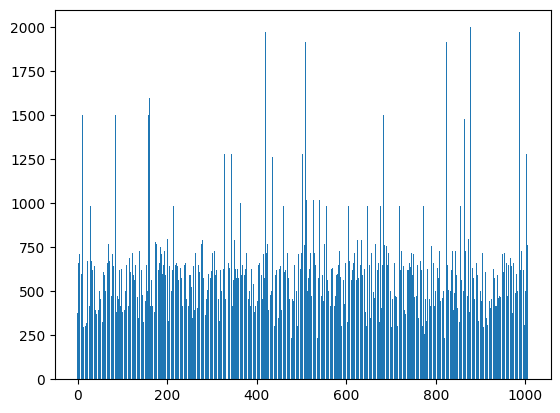

In [113]:
plt.bar(df.index, df['Horsepower'])
plt.show()


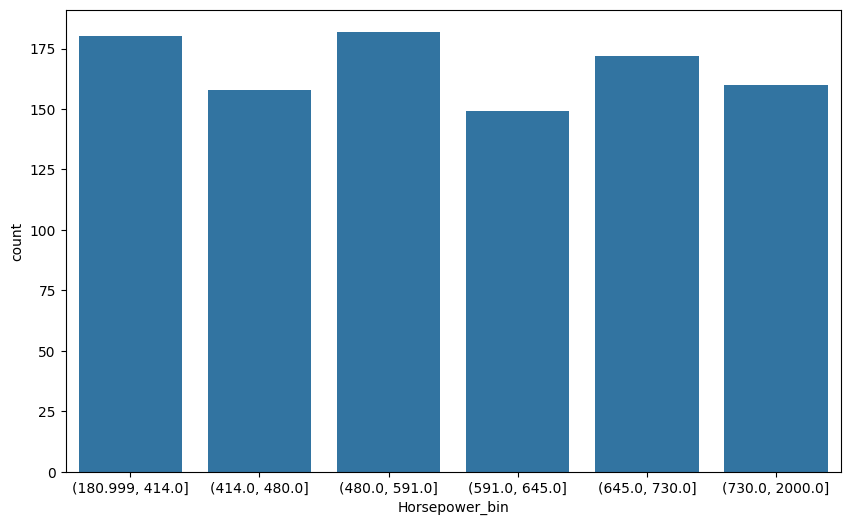

In [118]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Horsepower_bin', data= df)
plt.show()

In [115]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64','bool']).corr()

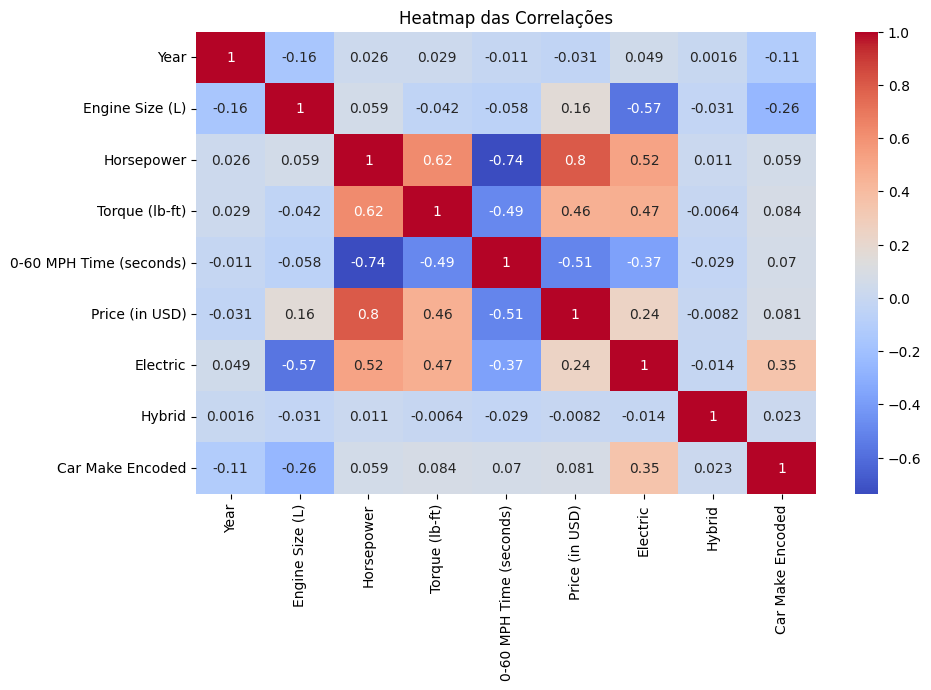

In [116]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap das Correlações')
plt.show()